# Decision Trees

## Plot Tree

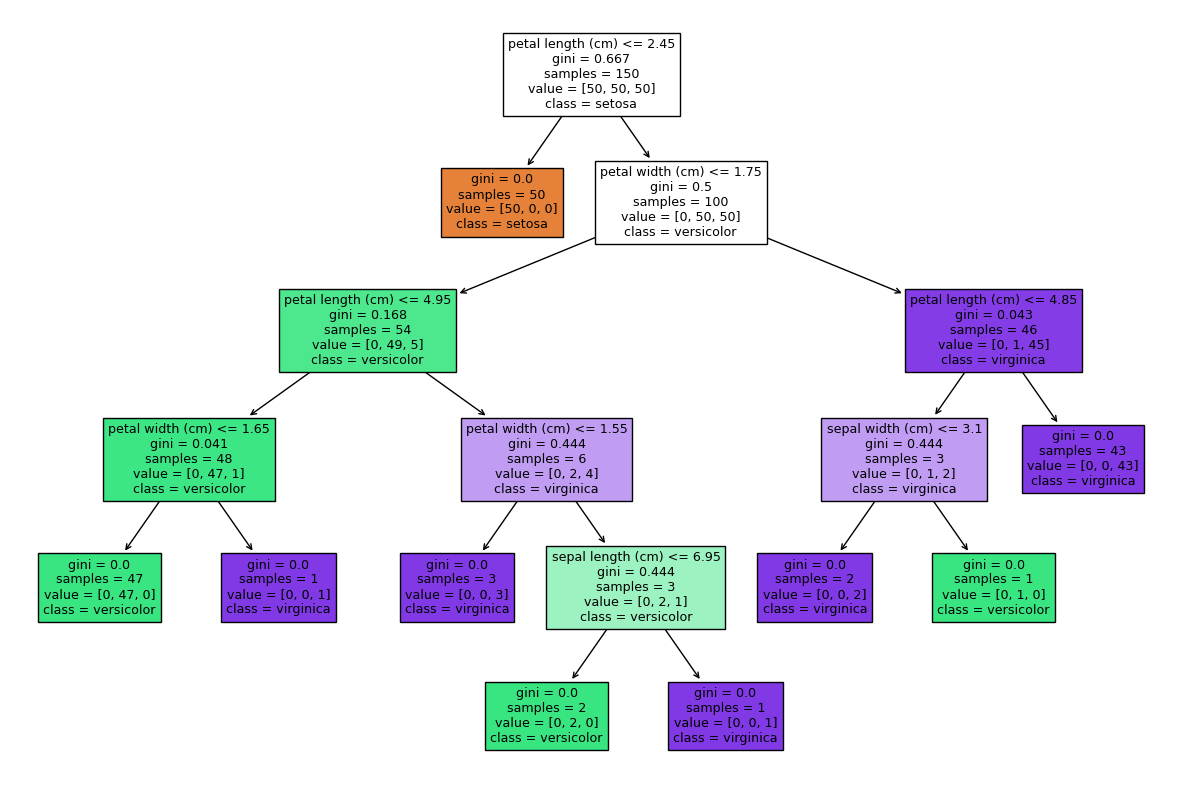

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Create a decision tree classifier and fit it to the iris data
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(iris.data, iris.target)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### + Decision Boundary (two dimensions/two features)

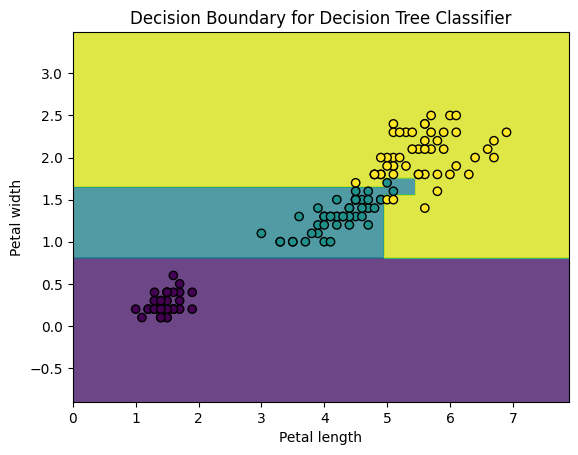

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = datasets.load_iris()

# We only take the two corresponding features: petal length and petal width
X = iris.data[:, 2:4]
y = iris.target

# Fit a DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Use the classifier to predict the class for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Boundary for Decision Tree Classifier')
plt.show()

## DecisionTreeClassifier

Accuracy: 95.0%


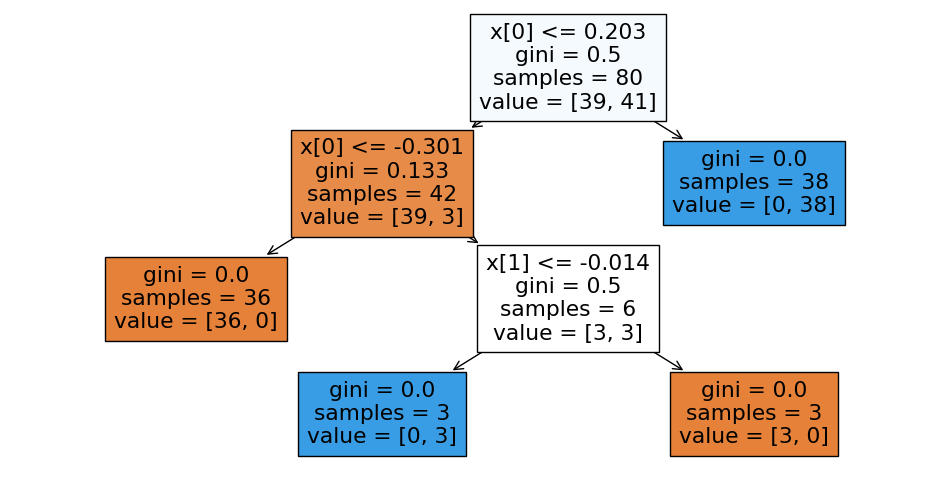

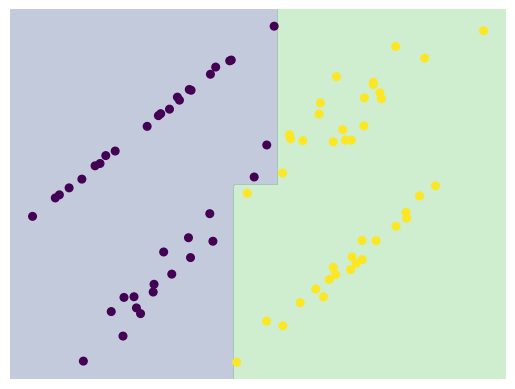

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a binary classification dataset.
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier.
clf = DecisionTreeClassifier()

# Train the classifier on the training set.
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set.
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier.
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100}%")

# Plot the decision tree.
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(clf, filled=True, ax=ax)
plt.show()

# Plot the decision boundary.
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='viridis', clim=(y_train.min(), y_train.max()), zorder=3)
ax.axis('tight')
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results.
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='viridis', zorder=1)

plt.show()
